In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers, utils, models, callbacks as cb
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

c:\Users\abdal\miniconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\abdal\miniconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\abdal\miniconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
model = models.load_model('save_at_1.h5')

In [3]:
val = tf.keras.preprocessing.image_dataset_from_directory(
    "validation",
    image_size=(780, 1280),
    batch_size=1,
    shuffle=False
)



Found 33 files belonging to 3 classes.


In [4]:
yytest = []
yypred = []

for xtest, ytest in val:
    # //xtest = np.expand_dims(xtest,axis=0)
    ypred = model(xtest)
    #break
    yytest.append(ytest[0])
    yypred.append(ypred[0])

In [5]:
# yytest = np.array([np.argmax(y) for y in yytest], dtype=np.int32)
yypred = np.array([np.argmax(y) for y in yypred], dtype=np.int32)

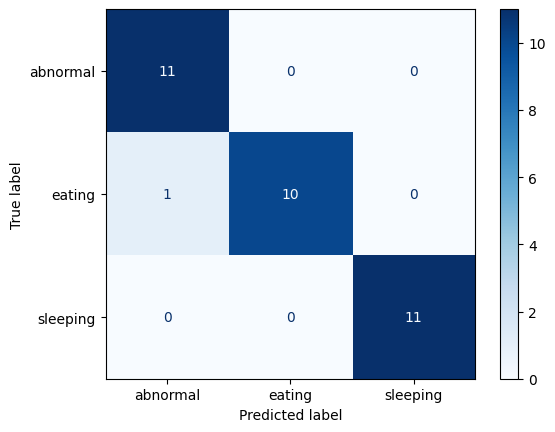

In [6]:
result =  confusion_matrix(yytest, yypred)
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=["abnormal", "eating","sleeping"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [7]:
# image_size = (540,960)
# batch_size = 32

# # val_ds = tf.keras.preprocessing.image_dataset_from_directory(
# #     "validation",
# #     seed=1337,
# #     image_size=image_size,
# #     batch_size=batch_size,
# # )
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "validation",
#   seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
# )

In [8]:
# model = models.load_model(r'E:\University\Semester 6\Grad\tile classification 2 - Copy\tile classifciation\testall.h5')


In [9]:
# train_ds = train_ds.unbatch().batch(32, drop_remainder=True)
# train_label = np.concatenate([tf.keras.utils.to_categorical(y, num_classes=5) for x, y in train_ds], axis=0)
# y_prediction = model.predict(train_ds)



In [10]:
# print(train_label.shape)
# print(y_prediction.shape)

In [11]:
# matrix = confusion_matrix(
#     np.argmax(train_label, axis=1),
#     np.argmax(y_prediction, axis=1),
# )
# disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[f"tile{i}" for i in range(1, 6)])
# disp.plot(cmap=plt.cm.Reds)
# plt.show()


In [12]:
result = model.evaluate(val)

33/33 [==============================] - 1s 13ms/step - loss: 0.0494 - accuracy: 0.9697
